In [8]:
from pathlib import Path
import time
import random
from src import mosaic, plotting
from config.config import copy_file_to_new_dir


In [9]:
# half_tile: (int) a number between 4 and 30, representing the half size of mosaic tiles
# GAUSS: (int) a number between 0 and 8, used to blur the image before edge detection. Check "edges" image for a good value.
# EDGE_DETECTION: (str) either 'HED' or 'DiBlasi', representing the type of edge detection
# WITH_FRAME: (bool) True by default, used to control guidelines along image borders
# RAND_SIZE: (float) a number between 0 and 1, representing the portion of tile size which is added or removed randomly during construction
# MAX_ANGLE: (int) a number between 30 and 75, representing the maximum construction angle for tiles along roundings
# GAP_CHAIN_SPACING: (float) a number between 0.4 and 1.0, representing the spacing of gap filler chains
# MAKE_CONVEX: (bool) True by default, used to break concave into more realistic polygons
# COLOR_SCHEMA: (list) a list of string values representing the color schema to be used. The available options are 'wise_men', 'fish', 'cave_canem', 'nilotic', 'rooster', 'carpe_diem', 'Hyena'. Leave empty to plot all available options.
# plot_list: (list) a list of string values representing the images to be plotted. The available options are 'original', 'edges', 'distances', 'guidelines', 'gradient', 'angles_0to180', 'polygons_chains', 'used_up_space', 'distance_to_tile', 'filler_guidelines', 'polygons_filler', 'polygons_cut', 'final', 'final_recolored', 'statistics'.
# output_path: (Path) the path to the output directory
# input_image: (Path) the path to the input image
COLOR_SCHEMA = [
    'nilotic',
    # 'wise_men',
    # 'fish',
    # 'cave_canem',
    # 'nilotic', 'rooster',
    # 'carpe_diem',
    # 'Hyena'
]
# choose which image to plot
plot_list = [
    # 'original',
    # 'edges', # CAN BE HELPFUL FOR ADJUSTING GAUSS PARAMETER
    # 'distances',
    'guidelines',
    # 'gradient',
    # 'angles_0to180',
    'polygons_chains',
    # 'used_up_space',
    # 'distance_to_tile',
    # 'filler_guidelines',
    # 'polygons_filler',
    # 'polygons_cut',
    'final', # <== MOST IMPORTANT
    # 'final_recolored', # <== OR THIS
    # 'statistics',
    ]

parameters = {
    'half_tile': 12,
    'GAUSS': 3,
    'EDGE_DETECTION': 'DiBlasi', # 'HED' or 'DiBlasi'
    'WITH_FRAME': True,
    'RAND_SIZE': 0.3,
    'MAX_ANGLE': 40,
    'GAP_CHAIN_SPACING': 0.5,
    'MAKE_CONVEX': True,
    'COLOR_SCHEMA': COLOR_SCHEMA,
    'plot_list': plot_list,
    'SHOW_IMAGE': True,
    'SAVE_IMAGE': True,
    'output_path': Path("data/output_img/"),
    'input_image': Path("data/input_img/grid_0.png")
}

output_images = {}


In [10]:
parameters['save_path'] = copy_file_to_new_dir(parameters['input_image'], parameters['output_path'])

In [11]:
mosaic.generate_mosaic(parameters=parameters, output_images=output_images)

Size of input image: 900px * 900px
Estimated number of tiles: 2812
Pixel guidelines to chains with sorted points: 0.7s
Calculation of angle matrix: 1.3s
Placed 1209 tiles along guidelines 1.9s


/usr/local/lib/python3.8/dist-packages/shapely/set_operations.py:77: RuntimeWarning: divide by zero encountered in difference
  return lib.difference(a, b, **kwargs)


Added 1370 tiles into gaps: 12.5s
Up to 523 tiles beyond image borders were cut 0.1s
1021 tiles converted to convex 1.4s
Dropped 93 small tiles 
Total calculation time: 00 min 30 s
Final number of tiles: 2621


data/output_img/grid_0/guidelines.png


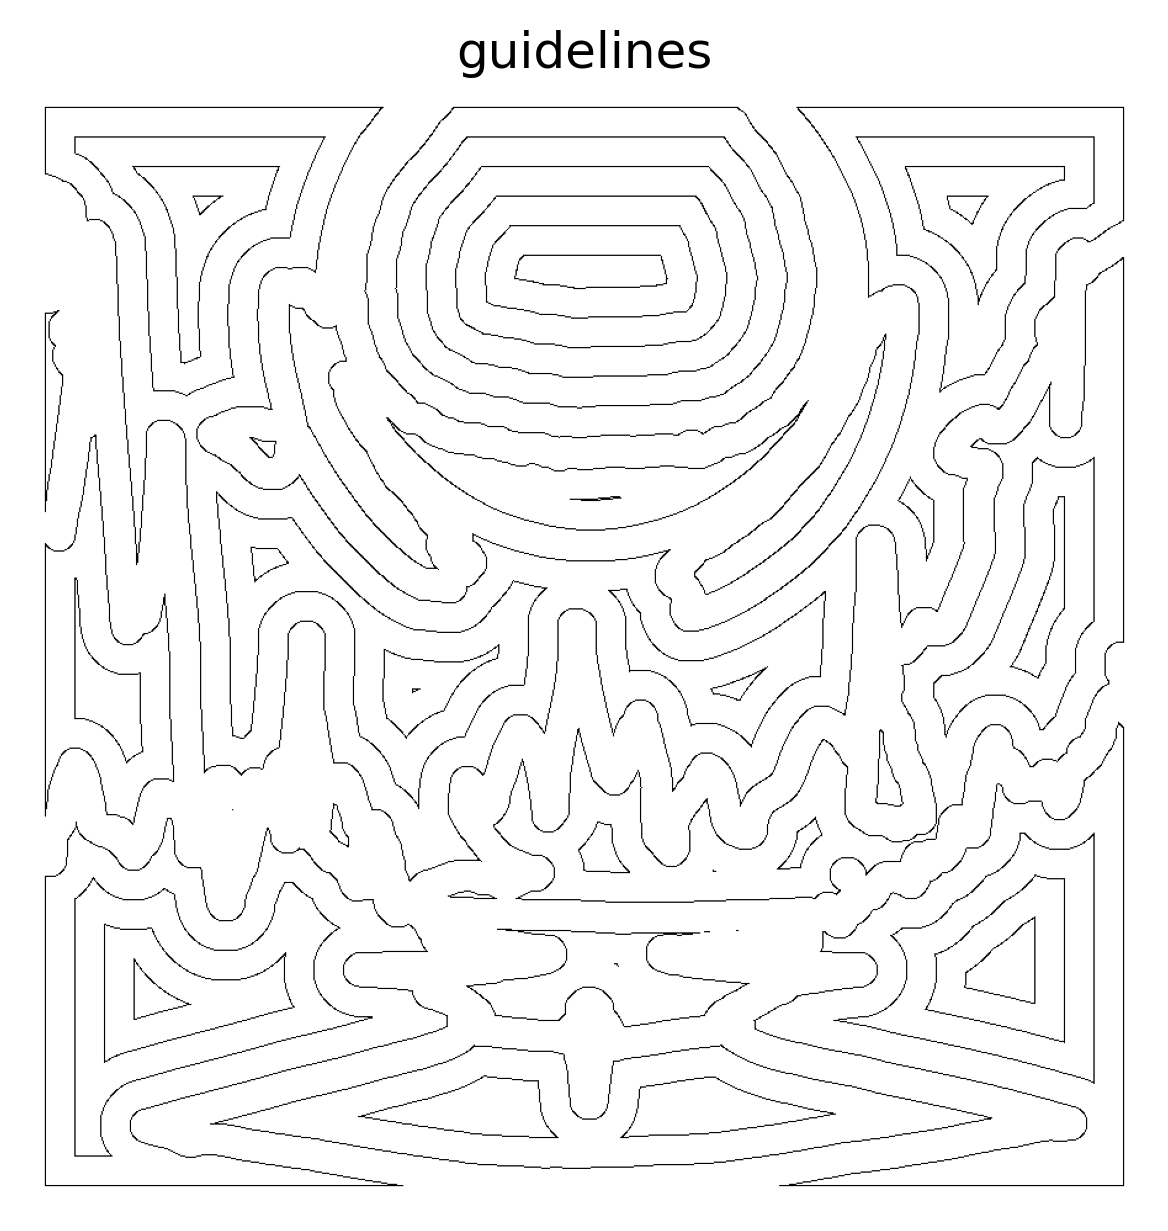

data/output_img/grid_0/polygons_chains.png


UnboundLocalError: local variable 'svg' referenced before assignment

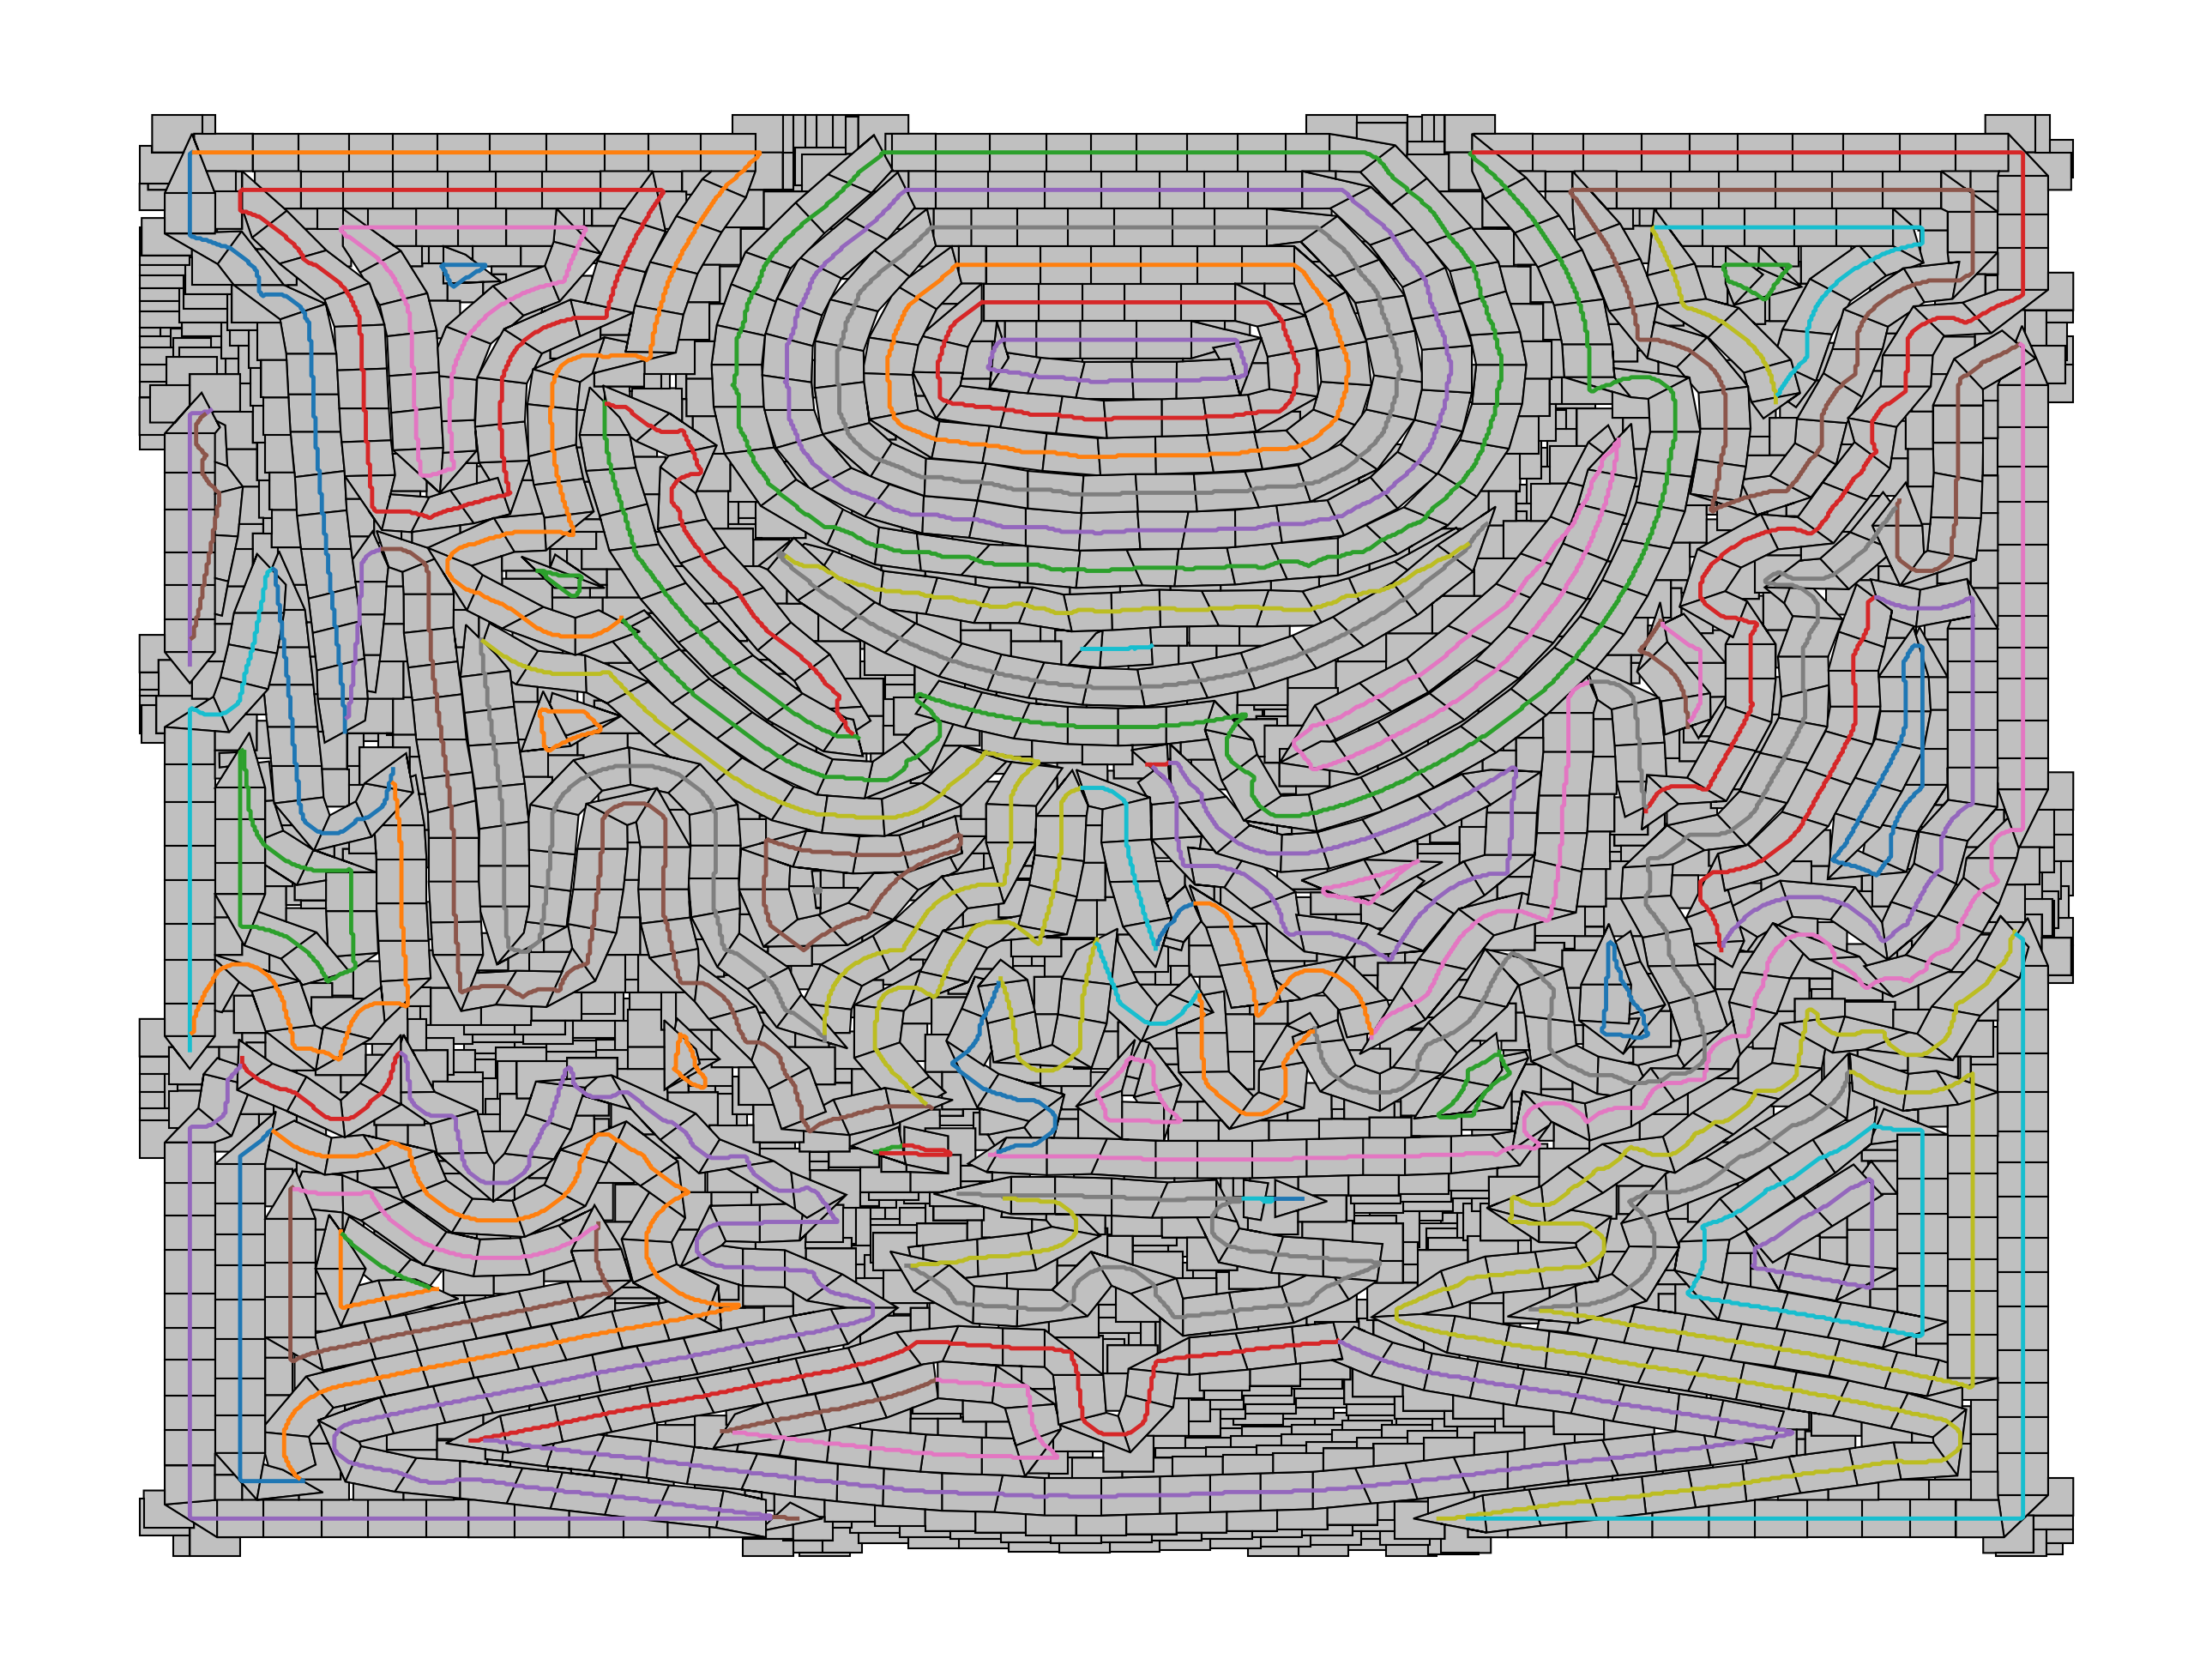

In [12]:
plotting.save_images(parameters=parameters, output_images=output_images)